In [1]:


import cifar10
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# from sklearn import neural_network
from sklearn.neural_network import MLPClassifier





In [2]:
import tensorflow as tf

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# print(y_train.dtype)
# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0





In [3]:
xtrain1 = x_train.reshape(x_train.shape[0], -1)
xtest1 = x_test.reshape(x_test.shape[0], -1)
ytrain1 = y_train.flatten()
ytest1 = y_test.flatten()

x_train_flat = xtrain1
y_train_flat = ytrain1



x_test_flat = xtest1
y_test_flat = ytest1
# Print the shapes to verify
print("xtrain1 shape:", xtrain1.shape)
print("xtest1 shape:", xtest1.shape)


xtrain1 shape: (50000, 3072)
xtest1 shape: (10000, 3072)


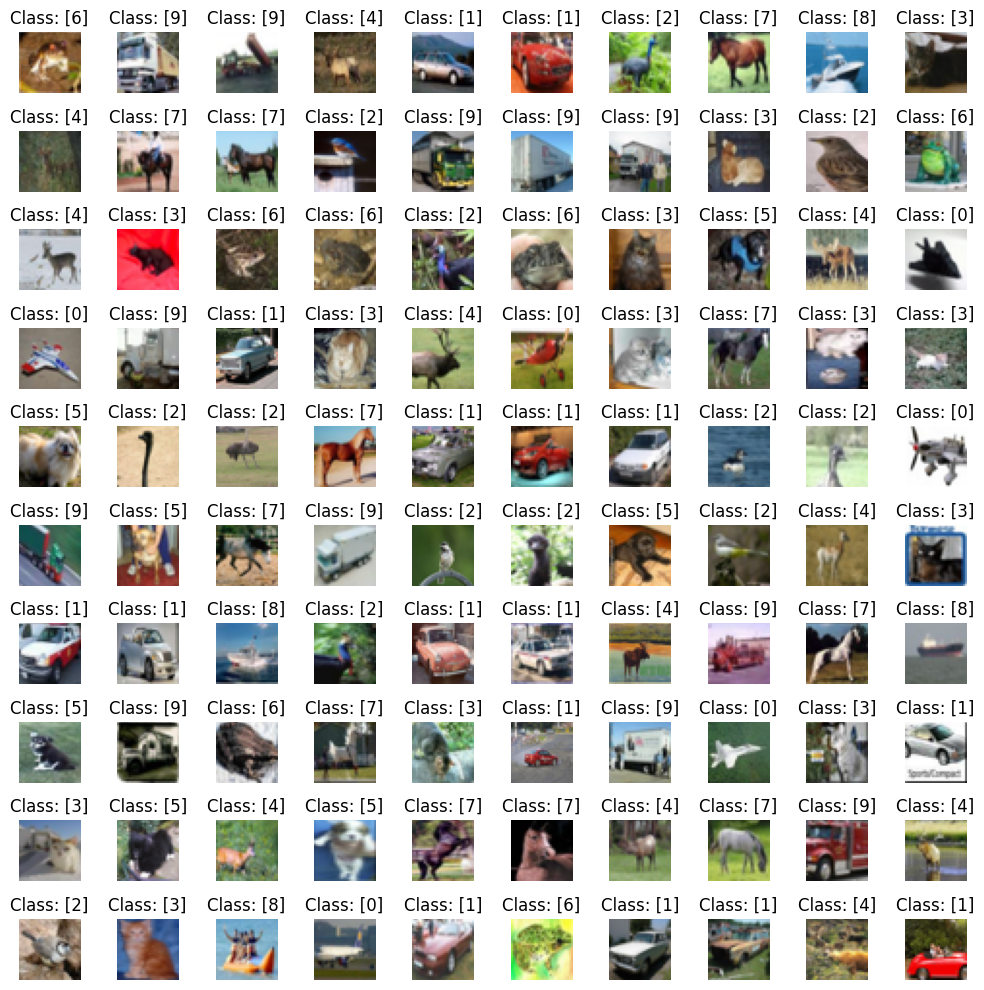

In [4]:
def show_images(images, labels, num_images=25):
    cols, rows = int(math.sqrt(num_images)), int(math.sqrt(num_images))
    fig, axes = plt.subplots(ncols=cols, nrows=rows, figsize=(10, 10))
    img_ctr = 0; 
    for i in range(cols):
        for j in range(rows):
            axes[i,j].set_title(f'Class: {labels[img_ctr]}')
            # axes[i]

            
            axes[i,j].imshow(images[img_ctr])
            axes[i, j].axis('off')
            img_ctr += 1

    plt.tight_layout();
    plt.show()
    


show_images(x_train, y_train, 100)

In [5]:
from sklearn.neural_network import MLPClassifier as MLPClassifier

In [6]:
mlp = MLPClassifier(hidden_layer_sizes=100, activation='logistic', verbose=True , max_iter = 1000)

In [8]:
mlp.fit(X=xtrain1, y=ytrain1)
# x = mlp.score(x_test, y_test)
# print(x)


Iteration 1, loss = 1.94071210
Iteration 2, loss = 1.77138726
Iteration 3, loss = 1.69850696
Iteration 4, loss = 1.64938360
Iteration 5, loss = 1.60676546
Iteration 6, loss = 1.57168222
Iteration 7, loss = 1.54580711
Iteration 8, loss = 1.52086975
Iteration 9, loss = 1.50133886
Iteration 10, loss = 1.47927507
Iteration 11, loss = 1.46183497
Iteration 12, loss = 1.44252193
Iteration 13, loss = 1.43004765
Iteration 14, loss = 1.41181772
Iteration 15, loss = 1.40144080
Iteration 16, loss = 1.38256047
Iteration 17, loss = 1.36930273
Iteration 18, loss = 1.35864474
Iteration 19, loss = 1.34495744
Iteration 20, loss = 1.33717480
Iteration 21, loss = 1.32564709
Iteration 22, loss = 1.31830851
Iteration 23, loss = 1.30827657
Iteration 24, loss = 1.29790786
Iteration 25, loss = 1.28420143
Iteration 26, loss = 1.28160348
Iteration 27, loss = 1.26388239
Iteration 28, loss = 1.26250156
Iteration 29, loss = 1.25394480
Iteration 30, loss = 1.24208224
Iteration 31, loss = 1.23350574
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=100, max_iter=1000,
              verbose=True)

In [6]:

from sklearn.metrics import accuracy_score

In [7]:
ypred1 = mlp.predict(xtrain1)

# Evaluate the classifier
accuracy = accuracy_score(ypred1, ytrain1)

ypred2 = mlp.predict(xtest1)
accuracy2 = accuracy_score(ypred2, ytest1)

NotFittedError: This MLPClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [10]:
print(accuracy)
print(accuracy2)

0.93592
0.4359


Number of neurons: 50, Test set accuracy: 43.74%
Number of neurons: 100, Test set accuracy: 44.76%
Number of neurons: 150, Test set accuracy: 46.76%
Number of neurons: 200, Test set accuracy: 47.28%
Number of neurons: 250, Test set accuracy: 47.42%


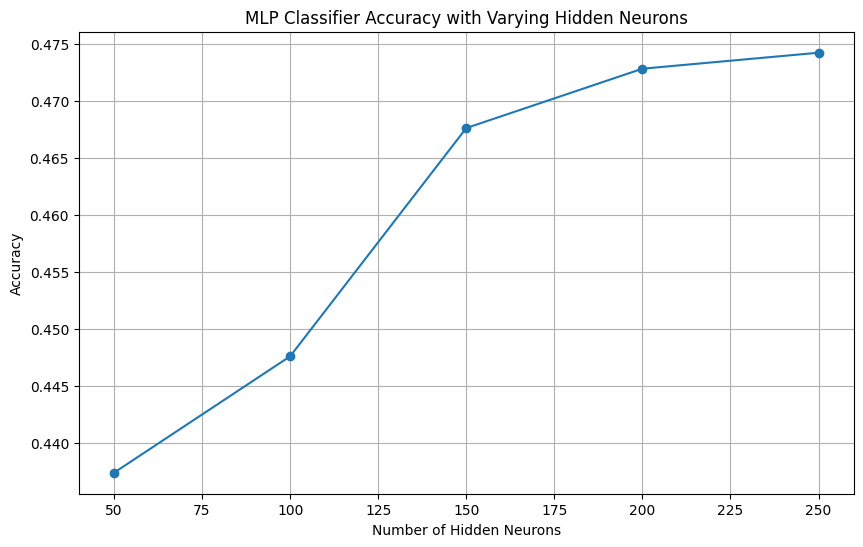

In [11]:
neuron_range = [50, 100, 150, 200, 250]
accuracy_scores = []

for neurons in neuron_range:
    # Train an MLP classifier with varying hidden neurons
    mlp = MLPClassifier(hidden_layer_sizes=neurons, activation='logistic', verbose=False , max_iter = 1000)
    
    mlp.fit(xtrain1, ytrain1)

    # Predict on the test data
    y_pred = mlp.predict(xtest1)

    # Evaluate the classifier
    accuracy = accuracy_score(ytest1, y_pred)
    accuracy_scores.append(accuracy)
    print(f"Number of neurons: {neurons}, Test set accuracy: {accuracy * 100:.2f}%")

# Plot the accuracy scores
plt.figure(figsize=(10, 6))
plt.plot(neuron_range, accuracy_scores, marker='o')
plt.title('MLP Classifier Accuracy with Varying Hidden Neurons')
plt.xlabel('Number of Hidden Neurons')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

So what did we learn? This shit fucking sucked omg. And it killed my fucking laptop too. But it's likely that there's just too many neurons that it trained on and for sake of not owning 100000 gpus i should run it on a smaller data set to tinker more with this stuff. Additionally, this data should be run through a black and white dataset to compare.  

In [9]:
activation_functions = ['identity', 'logistic', 'tanh', 'relu']
# for activation in activation_functions:
#     # Train an MLP classifier with varying activation functions
#     mlp = MLPClassifier(hidden_layer_sizes=best_neuron_sample, activation='logistic', verbose=False , max_iter = 1000)
    
#     mlp.fit(xtrain1, y_train)

#     # Predict on the test data
#     y_pred = mlp.predict(xtest1)

#     # Evaluate the classifier
#     accuracy = accuracy_score(y_test, y_pred)
#     accuracy_scores.append(accuracy)
#     print(f"Activation: {activation}, Test set accuracy: {accuracy * 100:.2f}%")

# # Plot the accuracy scores
# plt.figure(figsize=(10, 6))
# plt.bar(activation_functions, accuracy_scores, color='blue')
# plt.title('MLP Classifier Accuracy with Different Activation Functions')
# plt.xlabel('Activation Function')
# plt.ylabel('Accuracy')
# plt.grid(True)
# plt.show()

So what do we find out 


In [7]:
from skimage.color import rgb2gray

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train_gray = np.array([rgb2gray(img) for img in x_train])
x_test_gray = np.array([rgb2gray(img) for img in x_test])

x_train_gray = x_train_gray.astype('float32') / 255.0
x_test_gray = x_test_gray.astype('float32') / 255.0

xtrain_gray_flat = x_train_gray.reshape(x_train_gray.shape[0], -1)
xtest_gray_flat = x_test_gray.reshape(x_test_gray.shape[0], -1)

# y_train = y_train.flatten()
# y_test = y_test.flatten()

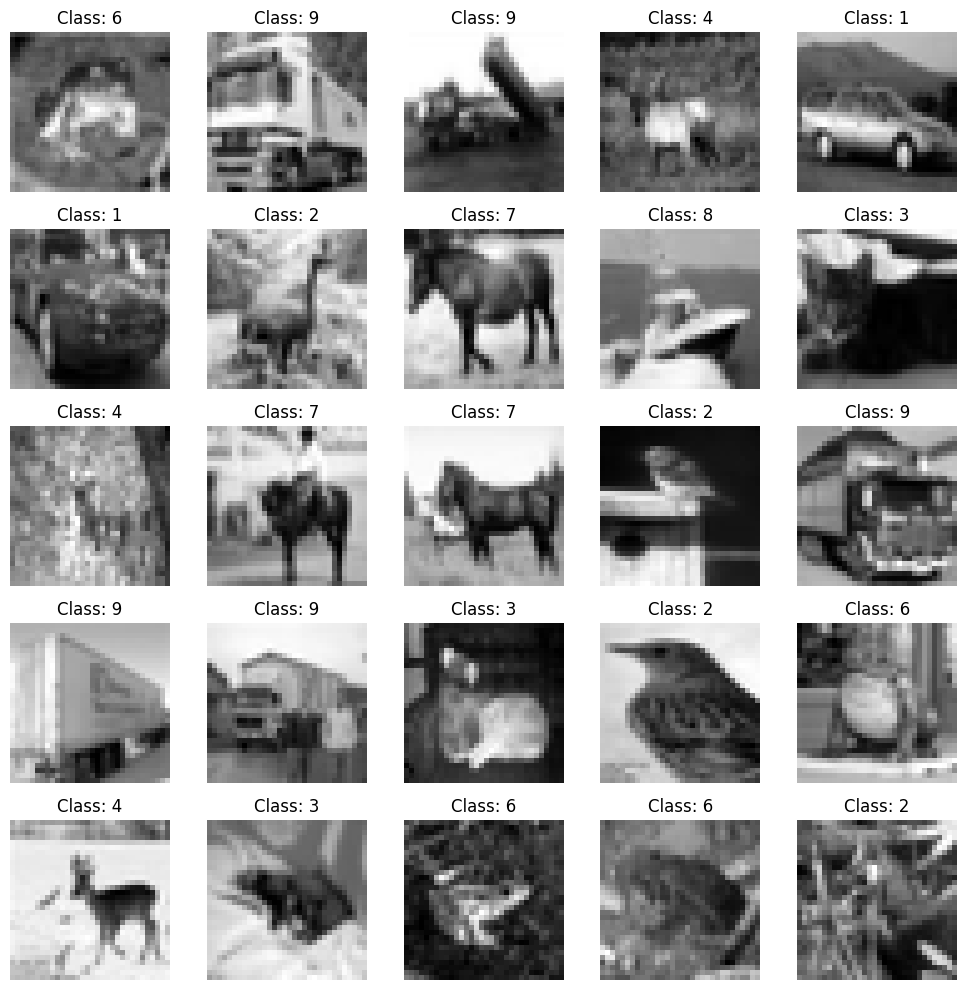

In [11]:
def show_images_blk_white(images, labels, num_images=25):
    cols, rows = int(math.sqrt(num_images)), int(math.sqrt(num_images))
    fig, axes = plt.subplots(ncols=cols, nrows=rows, figsize=(10, 10))
    img_ctr = 0; 
    for i in range(cols):
        for j in range(rows):
            axes[i,j].set_title(f'Class: {labels[img_ctr]}')
            # axes[i]

            
            axes[i,j].imshow(images[img_ctr], cmap = 'gray')
            axes[i, j].axis('off')
            img_ctr += 1

    plt.tight_layout();
    plt.show()
show_images_blk_white(x_train_gray, ytrain1)

I mentioned earlier I don't have the funds to afford 10000 of the top end GPUs so let's run this on a smaller data set and see what happens. I might leave some big shit to run overnight, but honestly it looks like such trash that I'm not sure its even worth it. 



In [8]:
generic_seed = 1234
def select_percentage_of_data(x, y, percentage, seed = generic_seed):
    """Select a percentage of the data for training."""
    np.random.seed(seed)  # For reproducibility
    num_samples = int(len(x) * (percentage / 100.0))
    indices = np.random.choice(len(x), num_samples, replace=False)
    return x[indices], y[indices]


In [9]:

percent_selected = 10

xtrain_gray_flat_small, ytrain_small_gray = select_percentage_of_data(xtrain_gray_flat, ytrain1, percent_selected); 
print(xtrain_gray_flat_small.shape)
print(ytrain_small_gray.shape)
xtrain_color_small, ytrain_small_color = select_percentage_of_data(xtrain1, ytrain1, percent_selected);

xtest_gray_flat_small, ytest_small_gray = select_percentage_of_data(xtest_gray_flat, y_test, percent_selected)
xtest_color_flat_small, ytest_small_color = select_percentage_of_data(xtest1, ytest1, percent_selected)
 

(5000, 1024)
(5000,)


In [ ]:
# show_images_blk_white()

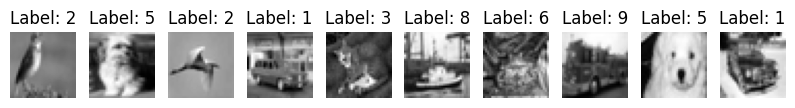

In [ ]:
# show_images_blk_white(xtrain_gray_flat_small, ytrain_small_gray)

def show_images_from_random_choice(images, labels, num_images=10):
    """Display a grid of images."""
    np.random.seed(generic_seed)
    plt.figure(figsize=(num_images, num_images))
    indices = np.random.choice(len(images), num_images, replace=False)
    for i, index in enumerate(indices):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[index], cmap='gray')
        plt.title(f"Label: {labels[index]}")
        plt.axis('off')
    plt.show()

show_images_from_random_choice(x_train_gray, ytrain1)

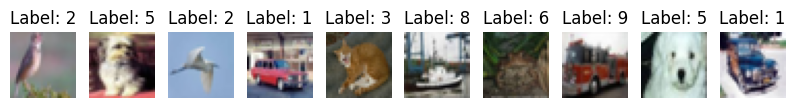

In [15]:
# show_images(xtrain_color_small, ytrain_small_color)
show_images_from_random_choice(x_train, ytrain1)

In [16]:
mlp_50 = MLPClassifier(hidden_layer_sizes=300, activation='relu', solver='adam', max_iter=1000, verbose=True)

mlp_50.fit(xtrain_gray_flat_small, ytrain_small_gray)

Iteration 1, loss = 2.30139266
Iteration 2, loss = 2.29173412
Iteration 3, loss = 2.28070757
Iteration 4, loss = 2.26549241
Iteration 5, loss = 2.24663339
Iteration 6, loss = 2.22411522
Iteration 7, loss = 2.20232353
Iteration 8, loss = 2.18385928
Iteration 9, loss = 2.16820204
Iteration 10, loss = 2.15519330


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(hidden_layer_sizes=300, max_iter=1000, verbose=True)

In [17]:
from sklearn.metrics import accuracy_score
_50_gray_flat_pred_test = mlp_50.predict(xtest_gray_flat)
accuracy = accuracy_score(ytest1, _50_gray_flat_pred_test)

_50_gray_flat_train_test = mlp_50.predict(xtrain_gray_flat_small);
accuracy_train = accuracy_score(ytrain_small_gray, _50_gray_flat_train_test)
print(f'Test accuracy: {accuracy}\tTrain accuracy {accuracy_train}')


Test accuracy: 0.3411	Train accuracy 0.6494


In [15]:
def cool_shit( xtrain, ytrain, xtest, ytest, neuron_range = [50, 100, 150, 250, 350], max_iter = 1000, activation = 'relu', solver='adam'): 


    accuracy_scores = []

    if activation == 'lbfgs' : 
        max_iters += 1000 # this is just to help this thing converge somewhat normally

    for neurons in neuron_range:
        # Train an MLP classifier with varying hidden neurons
        mlp = MLPClassifier(hidden_layer_sizes=neurons, activation=activation, verbose=False , max_iter = max_iter, solver=solver)
        
        mlp.fit(xtrain, ytrain)

        # Predict on the test data
        y_pred = mlp.predict(xtest)

        # Evaluate the classifier
        test_accuracy = accuracy_score(ytest, y_pred)
        y_train_pred = mlp.predict(xtrain)
        train_accuracy = accuracy_score(ytrain, y_train_pred)
        accuracy_scores.append(test_accuracy)
        print(f"Number of neurons: {neurons}, Test set accuracy: {test_accuracy* 100:.2f}%, Train Set Accuracy: {train_accuracy * 100:.2f}%, Curr Loss: {mlp.loss_}")

    # Plot the accuracy scores
    plt.figure(figsize=(10, 6))
    plt.plot(neuron_range, accuracy_scores, marker='o')
    plt.title(f'MLP Classifier Accuracy with Varying Hidden Neurons: Activation = {activation}, Solver = {solver}')
    plt.xlabel('Number of Hidden Neurons')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()



In [12]:
neuron_range = [50, 100, 200, 400, 800] # look ma i can use big numbers cuz i'm running this on small images (:

max_iterations = 2500

activations = ['relu', 'identity', 'logistic', 'tanh']
solvers = ['adam', 'sgd', 'lbfgs']

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Number of neurons: 50, Test set accuracy: 25.24%
Number of neurons: 100, Test set accuracy: 27.71%
Number of neurons: 150, Test set accuracy: 27.25%
Number of neurons: 200, Test set accuracy: 27.76%
Number of neurons: 250, Test set accuracy: 25.65%


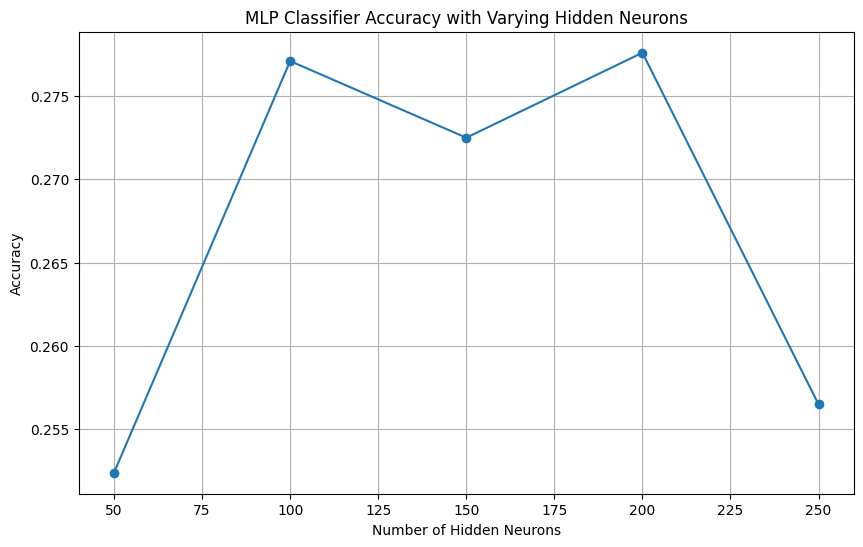

In [57]:


cool_shit(xtrain_gray_flat_small, ytrain_small_gray, xtest_gray_flat, y_test)




In [84]:
# for solver in solvers : 
#     cool_shit(xtrain=xtrain_gray_flat, ytrain=ytrain_small_gray)


mlp_50 = MLPClassifier(hidden_layer_sizes=300, activation='relu', solver='adam', max_iter=1000, verbose=True, n_iter_no_change=12)

mlp_50.fit(xtrain_color_small, ytrain_small_color)





Iteration 1, loss = 2.70603345
Iteration 2, loss = 2.08999247
Iteration 3, loss = 1.99798776
Iteration 4, loss = 1.95668132
Iteration 5, loss = 1.91989070
Iteration 6, loss = 1.88610016
Iteration 7, loss = 1.86141700
Iteration 8, loss = 1.86131411
Iteration 9, loss = 1.83190434
Iteration 10, loss = 1.79755558
Iteration 11, loss = 1.78324060
Iteration 12, loss = 1.78244210
Iteration 13, loss = 1.77459307
Iteration 14, loss = 1.75121935
Iteration 15, loss = 1.73827390
Iteration 16, loss = 1.71941437
Iteration 17, loss = 1.71100804
Iteration 18, loss = 1.68273623
Iteration 19, loss = 1.67099090
Iteration 20, loss = 1.64940226
Iteration 21, loss = 1.62620753
Iteration 22, loss = 1.62067585
Iteration 23, loss = 1.62631849
Iteration 24, loss = 1.59183229
Iteration 25, loss = 1.58365351
Iteration 26, loss = 1.57478385
Iteration 27, loss = 1.56693198
Iteration 28, loss = 1.54739984
Iteration 29, loss = 1.56633252
Iteration 30, loss = 1.52429871
Iteration 31, loss = 1.50794768
Iteration 32, los

MLPClassifier(hidden_layer_sizes=300, max_iter=1000, n_iter_no_change=20,
              verbose=True)

Number of neurons: 50, Test set accuracy: 36.40%
Number of neurons: 100, Test set accuracy: 37.82%
Number of neurons: 150, Test set accuracy: 39.85%
Number of neurons: 200, Test set accuracy: 33.42%
Number of neurons: 250, Test set accuracy: 39.57%


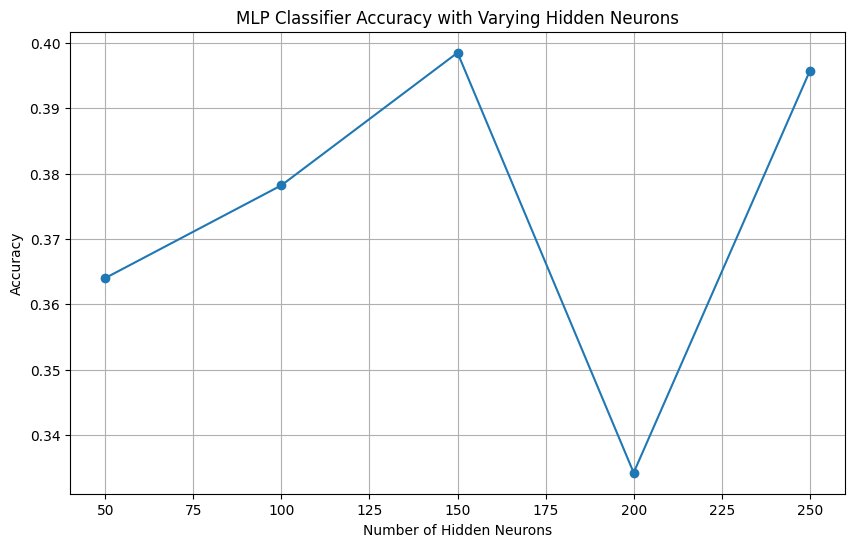

In [70]:
cool_shit(xtrain=xtrain_color_small, ytrain=ytrain_small_color, xtest=xtest_color_flat_small, ytest=ytest_small_color)

In [ ]:
mlp_50 = MLPClassifier(hidden_layer_sizes=300, activation='relu', solver='adam', max_iter=1000, verbose=True)


In [ ]:



_50_color_flat_pred_test = mlp_50.predict(xtest_color_flat_small)
accuracy_test = accuracy_score(ytest_small_color, _50_color_flat_pred_test)

_50_color_flat_train_test = mlp_50.predict(xtrain_color_small)
accuracy_train = accuracy_score(ytrain_small_color, _50_color_flat_train_test)

print(f'Test accuracy: {accuracy_test}\tTrain accuracy: {accuracy_train}')

Test accuracy: 0.364	Train accuracy: 0.9998


As seen above, the MLP tends to struggle with wild overfitting here even at just 50, perhaps some bias should be added. 

Number of neurons: 50, Test set accuracy: 22.90%
Number of neurons: 100, Test set accuracy: 32.70%
Number of neurons: 150, Test set accuracy: 37.20%
Number of neurons: 200, Test set accuracy: 37.20%
Number of neurons: 250, Test set accuracy: 35.50%


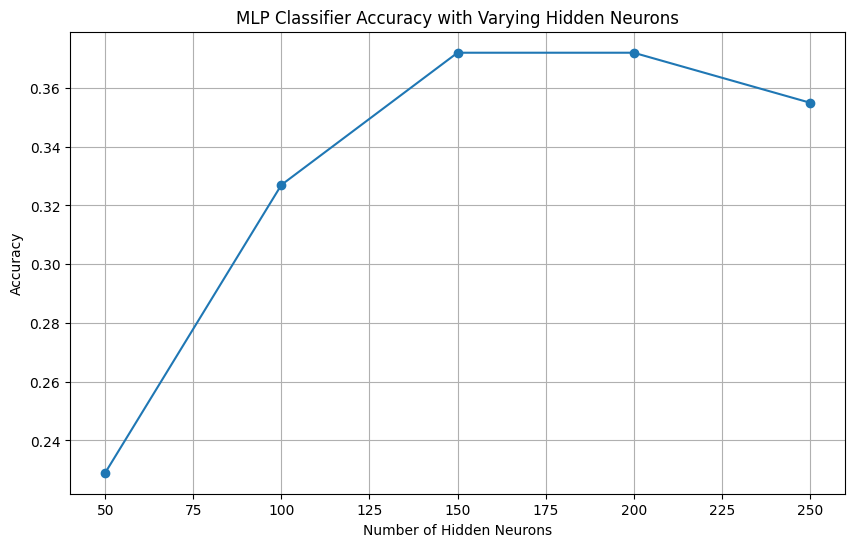

Number of neurons: 50, Test set accuracy: 35.00%
Number of neurons: 100, Test set accuracy: 39.30%
Number of neurons: 150, Test set accuracy: 38.90%
Number of neurons: 200, Test set accuracy: 39.30%
Number of neurons: 250, Test set accuracy: 39.80%


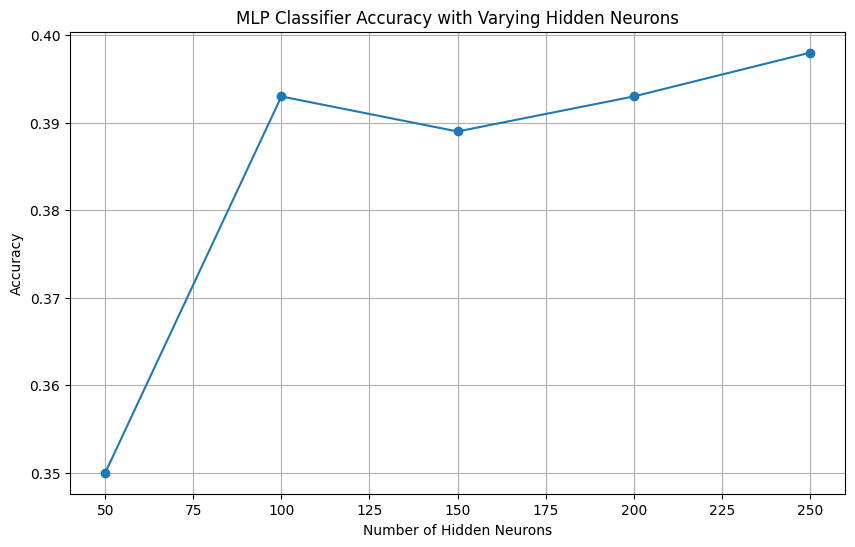

Number of neurons: 50, Test set accuracy: 34.70%
Number of neurons: 100, Test set accuracy: 34.20%
Number of neurons: 150, Test set accuracy: 34.60%
Number of neurons: 200, Test set accuracy: 36.70%
Number of neurons: 250, Test set accuracy: 36.60%


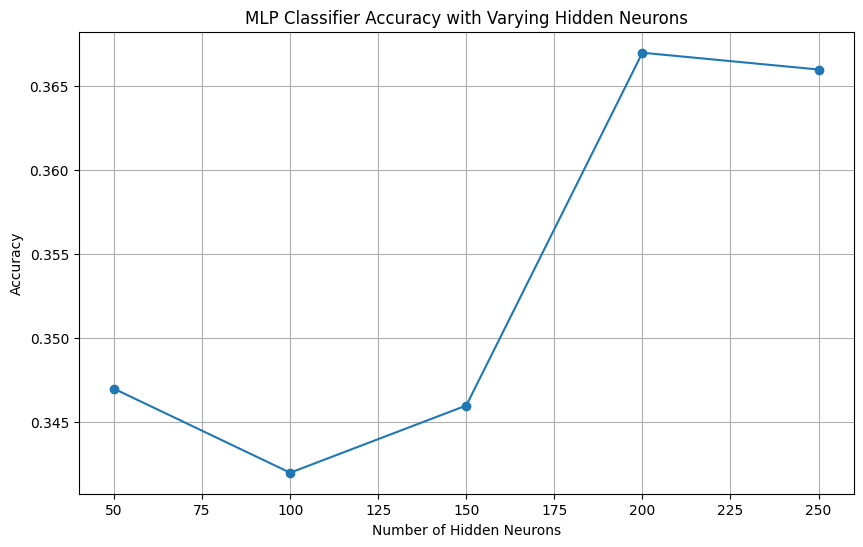

Number of neurons: 50, Test set accuracy: 30.30%
Number of neurons: 100, Test set accuracy: 30.80%
Number of neurons: 150, Test set accuracy: 32.60%
Number of neurons: 200, Test set accuracy: 31.40%
Number of neurons: 250, Test set accuracy: 31.10%


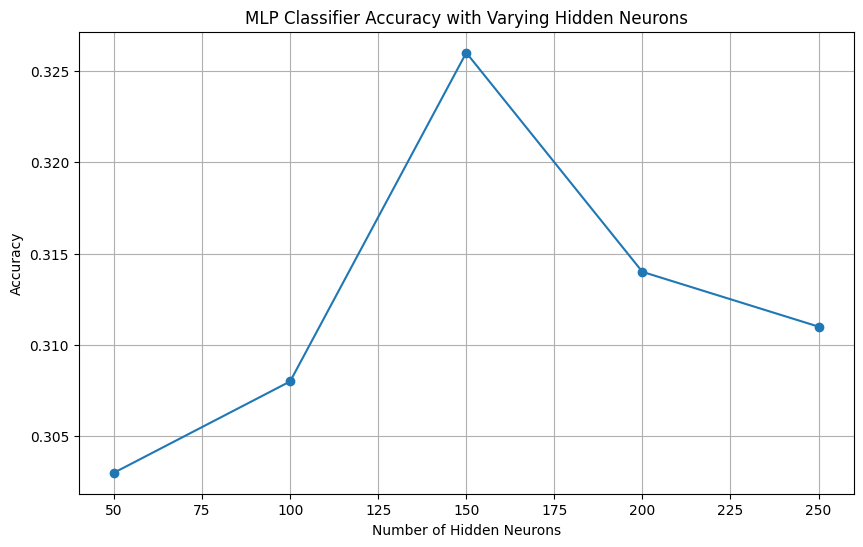

Number of neurons: 50, Test set accuracy: 30.30%
Number of neurons: 100, Test set accuracy: 31.70%
Number of neurons: 150, Test set accuracy: 31.50%
Number of neurons: 200, Test set accuracy: 29.70%
Number of neurons: 250, Test set accuracy: 30.10%


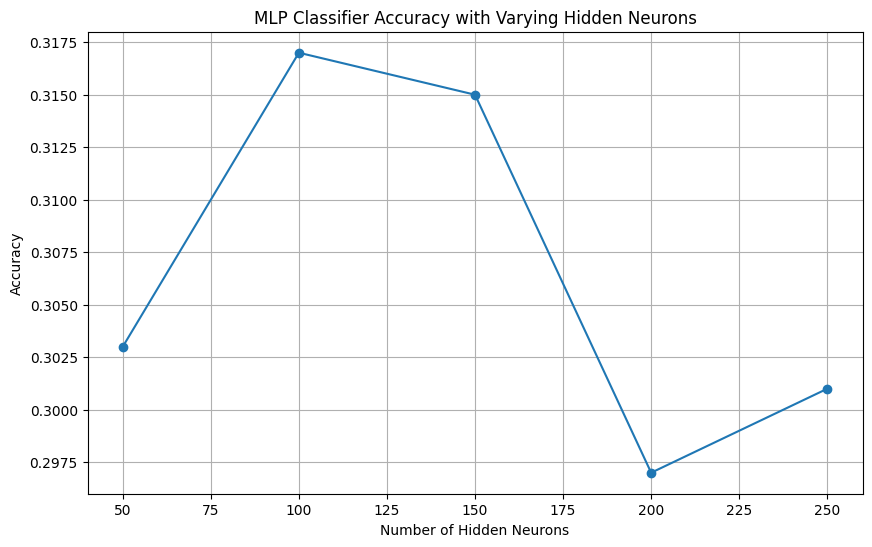

Number of neurons: 50, Test set accuracy: 26.40%
Number of neurons: 100, Test set accuracy: 25.70%
Number of neurons: 150, Test set accuracy: 26.30%
Number of neurons: 200, Test set accuracy: 26.10%
Number of neurons: 250, Test set accuracy: 26.60%


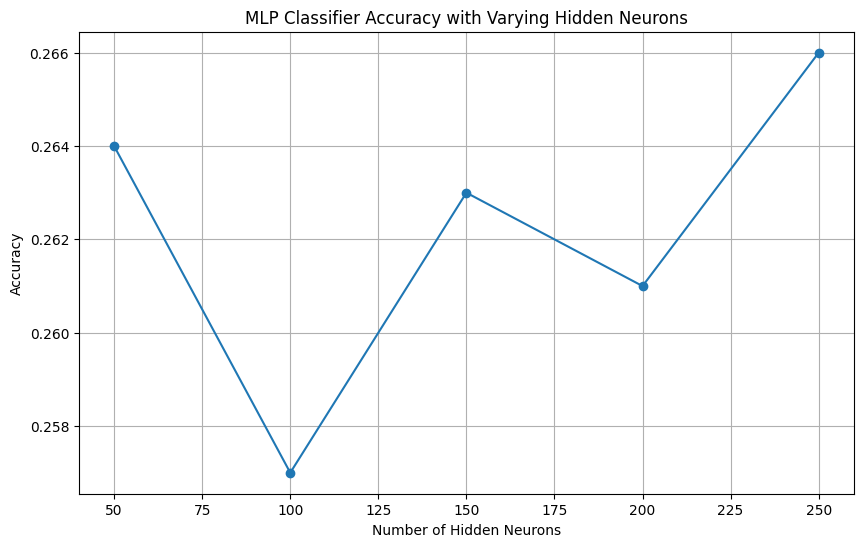

Number of neurons: 50, Test set accuracy: 34.00%
Number of neurons: 100, Test set accuracy: 38.00%
Number of neurons: 150, Test set accuracy: 39.70%
Number of neurons: 200, Test set accuracy: 40.90%
Number of neurons: 250, Test set accuracy: 38.50%


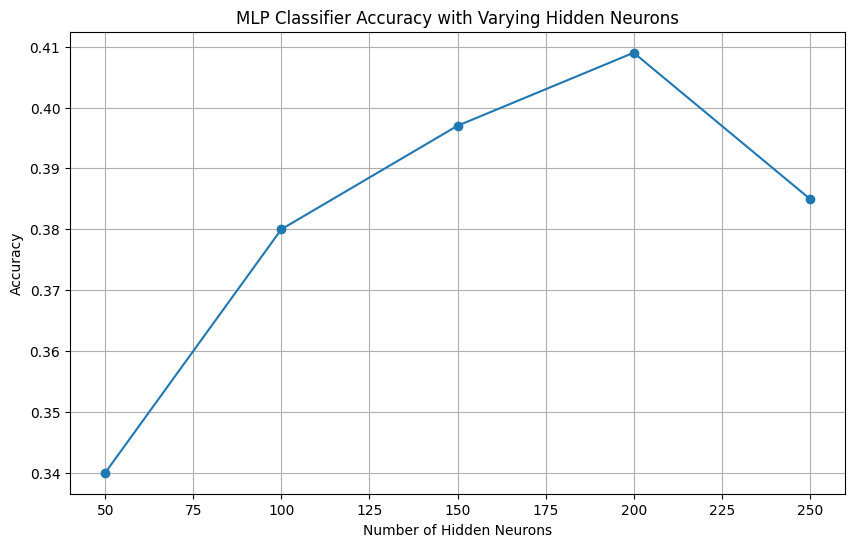

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of neurons: 50, Test set accuracy: 40.40%


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of neurons: 100, Test set accuracy: 40.10%


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of neurons: 150, Test set accuracy: 40.40%


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of neurons: 200, Test set accuracy: 40.60%


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of neurons: 250, Test set accuracy: 40.70%


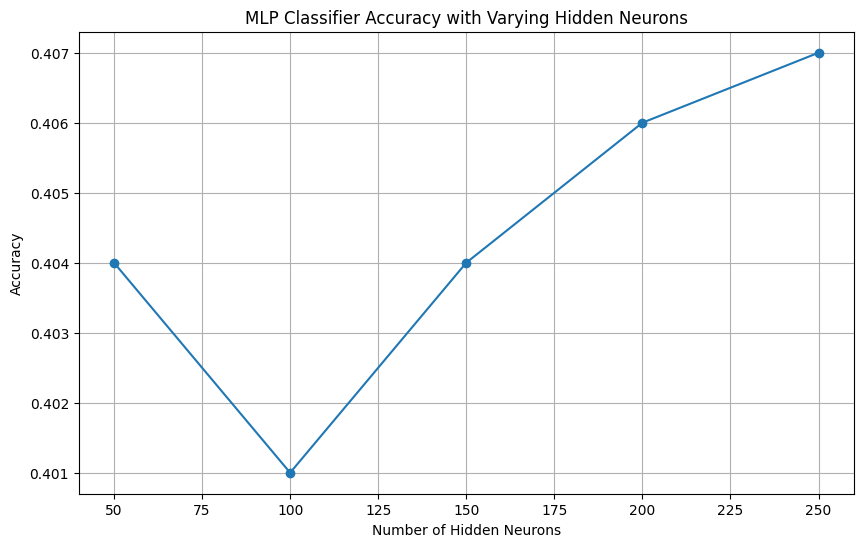

Number of neurons: 50, Test set accuracy: 29.90%
Number of neurons: 100, Test set accuracy: 30.50%
Number of neurons: 150, Test set accuracy: 35.40%
Number of neurons: 200, Test set accuracy: 35.40%
Number of neurons: 250, Test set accuracy: 35.50%


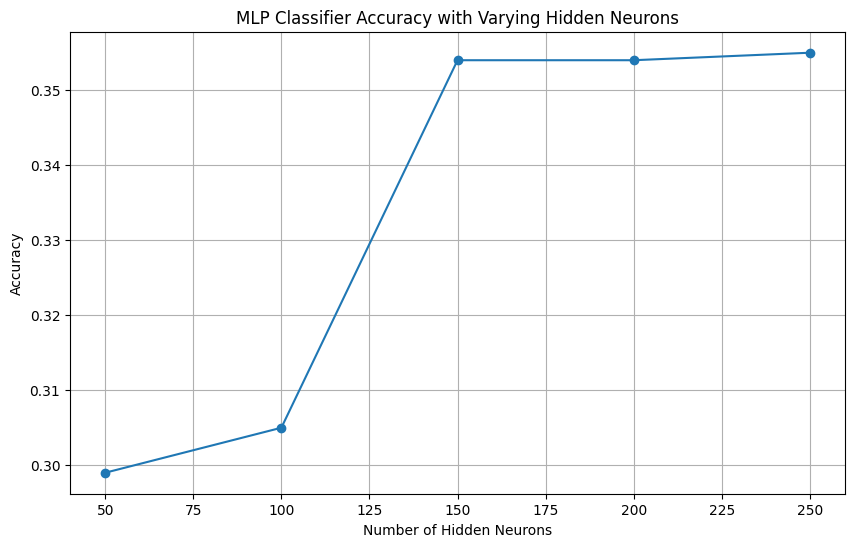

Number of neurons: 50, Test set accuracy: 34.40%
Number of neurons: 100, Test set accuracy: 36.20%
Number of neurons: 150, Test set accuracy: 35.60%
Number of neurons: 200, Test set accuracy: 34.80%
Number of neurons: 250, Test set accuracy: 37.20%


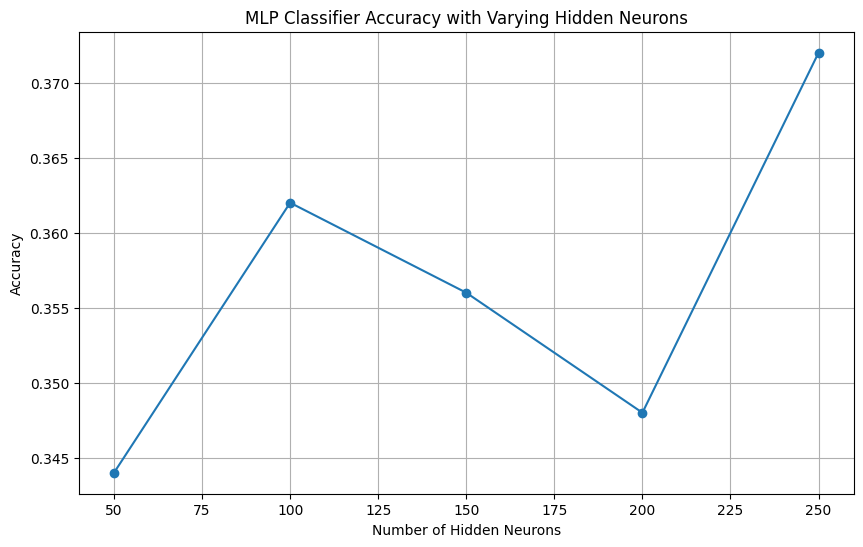

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of neurons: 50, Test set accuracy: 36.00%
Number of neurons: 100, Test set accuracy: 36.40%
Number of neurons: 150, Test set accuracy: 39.10%
Number of neurons: 200, Test set accuracy: 39.10%
Number of neurons: 250, Test set accuracy: 40.20%


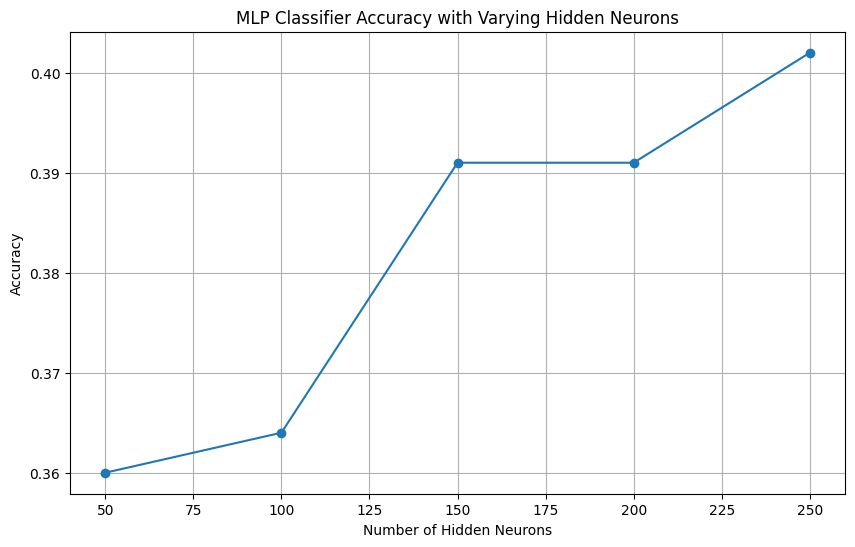

Number of neurons: 50, Test set accuracy: 29.80%
Number of neurons: 100, Test set accuracy: 34.60%
Number of neurons: 150, Test set accuracy: 34.60%
Number of neurons: 200, Test set accuracy: 32.50%
Number of neurons: 250, Test set accuracy: 35.70%


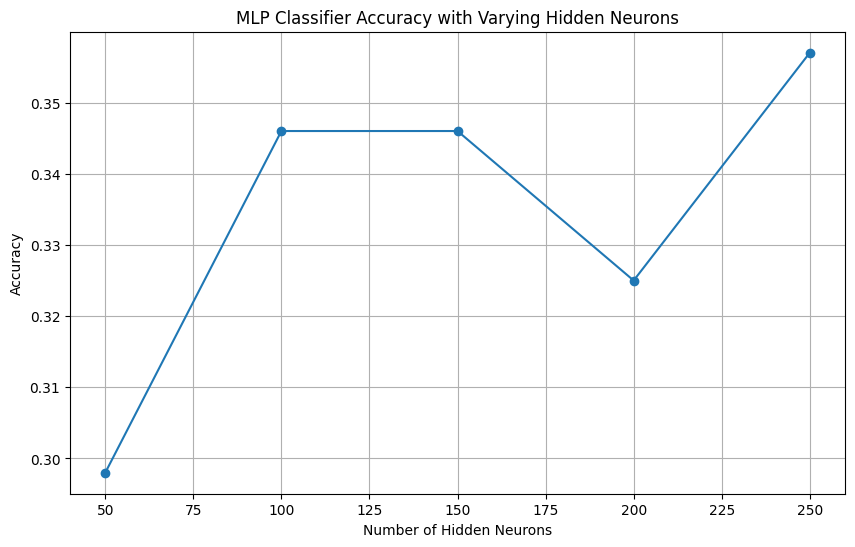

In [20]:

for activation in activations:
    for solver in solvers: 
        cool_shit(xtrain=xtrain_color_small, ytrain=ytrain_small_color, xtest=xtest_color_flat_small, ytest=ytest_small_color, activation=activation, max_iter=max_iterations, solver=solver)



So above as you can see there are twelve graph each which given an accuracy score based on the number of hidden neurons. The number of hidden neurons stays stable for each run through. So what do these graphs actually tell you (yes I forgot to update my function to show this information before I ran it overnight and realized just now)? The orderings are activations = $[relu, identity, logistic, tanh]$ and the solvers are 
$[adam, sgd, lbfgs]$. So how should we read this graph? This graph should be read in groups of threes with how well a certain activation did given a certain solver for the ranges on which it operated. The hidden number of neurons is shown, bias was not added. So what do we get here? 

In [30]:
print(f'small gray shape train{xtrain_gray_flat_small.shape}\nsmall gray shape test  {xtest_gray_flat_small.shape} ')

small gray shape train(5000, 1024)
 small gray shape test  (1000, 1024) 


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of neurons: 50, Test set accuracy: 30.40%
Number of neurons: 100, Test set accuracy: 31.80%
Number of neurons: 150, Test set accuracy: 31.00%
Number of neurons: 200, Test set accuracy: 32.50%
Number of neurons: 250, Test set accuracy: 31.60%


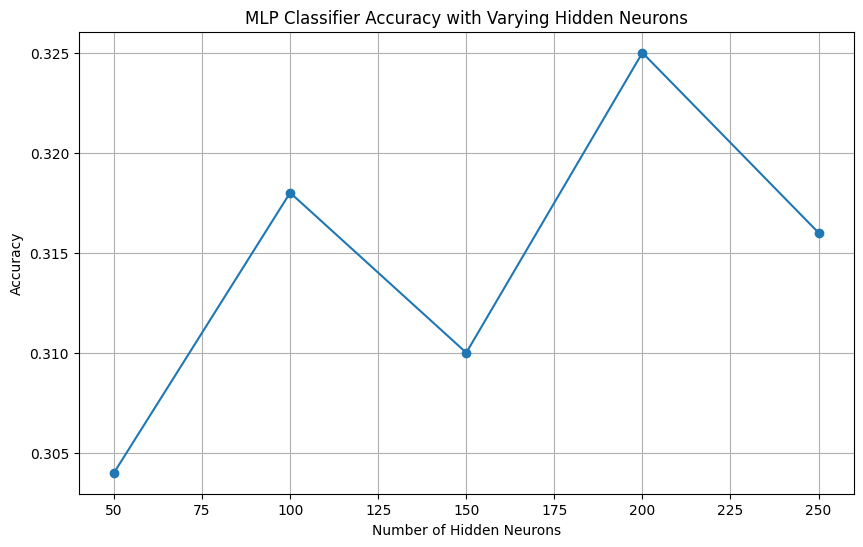

Number of neurons: 50, Test set accuracy: 9.70%
Number of neurons: 100, Test set accuracy: 9.20%
Number of neurons: 150, Test set accuracy: 9.10%
Number of neurons: 200, Test set accuracy: 11.20%
Number of neurons: 250, Test set accuracy: 9.10%


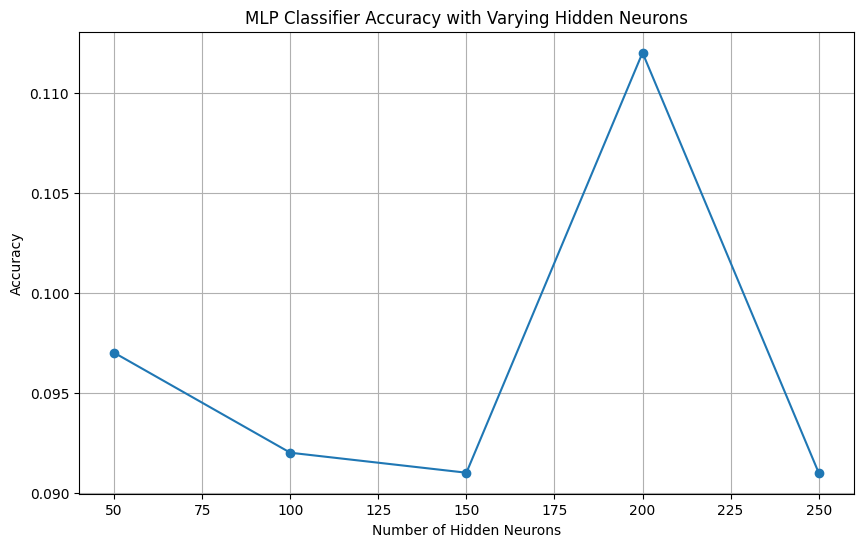

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Number of neurons: 50, Test set accuracy: 25.20%


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Number of neurons: 100, Test set accuracy: 22.20%


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Number of neurons: 150, Test set accuracy: 25.70%
Number of neurons: 200, Test set accuracy: 27.20%


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Number of neurons: 250, Test set accuracy: 26.80%


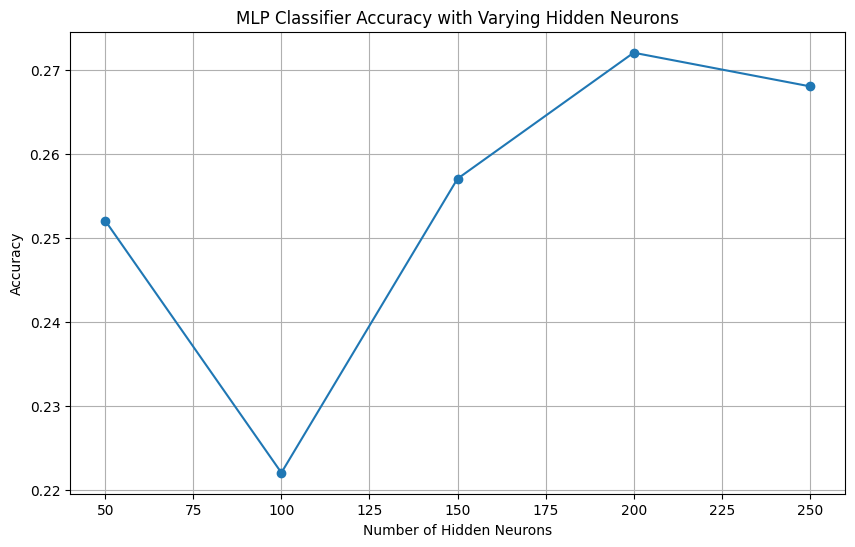

Number of neurons: 50, Test set accuracy: 26.70%
Number of neurons: 100, Test set accuracy: 25.50%
Number of neurons: 150, Test set accuracy: 23.00%
Number of neurons: 200, Test set accuracy: 25.10%
Number of neurons: 250, Test set accuracy: 25.00%


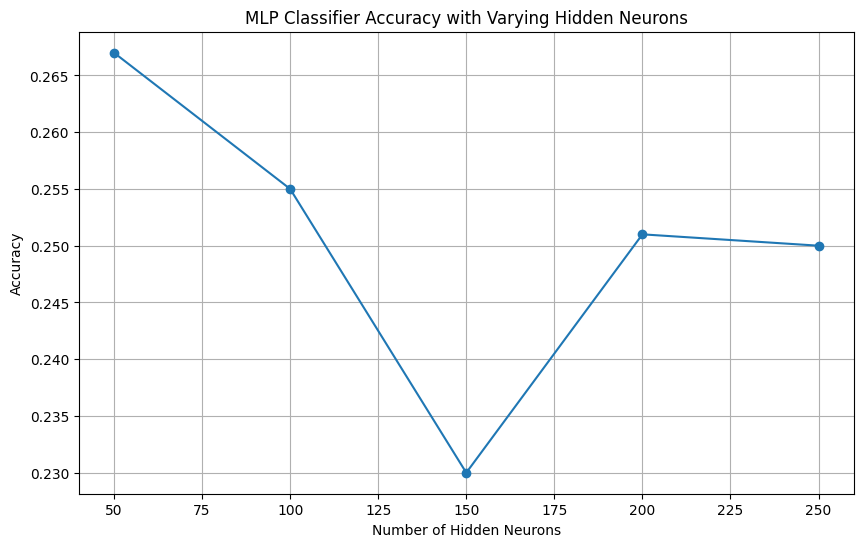

Number of neurons: 50, Test set accuracy: 9.10%
Number of neurons: 100, Test set accuracy: 9.40%
Number of neurons: 150, Test set accuracy: 11.20%
Number of neurons: 200, Test set accuracy: 11.20%
Number of neurons: 250, Test set accuracy: 11.10%


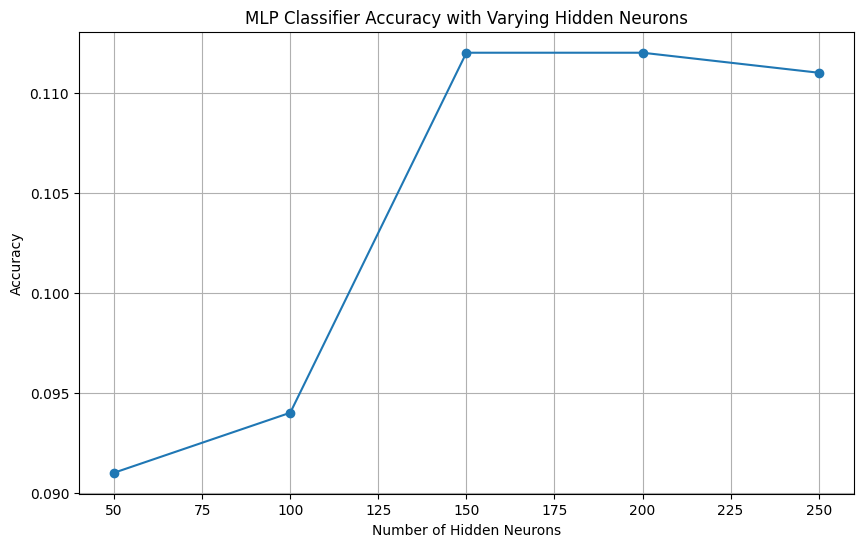

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Number of neurons: 50, Test set accuracy: 23.60%


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Number of neurons: 100, Test set accuracy: 21.20%


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Number of neurons: 150, Test set accuracy: 21.70%


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Number of neurons: 200, Test set accuracy: 21.70%
Number of neurons: 250, Test set accuracy: 21.40%


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


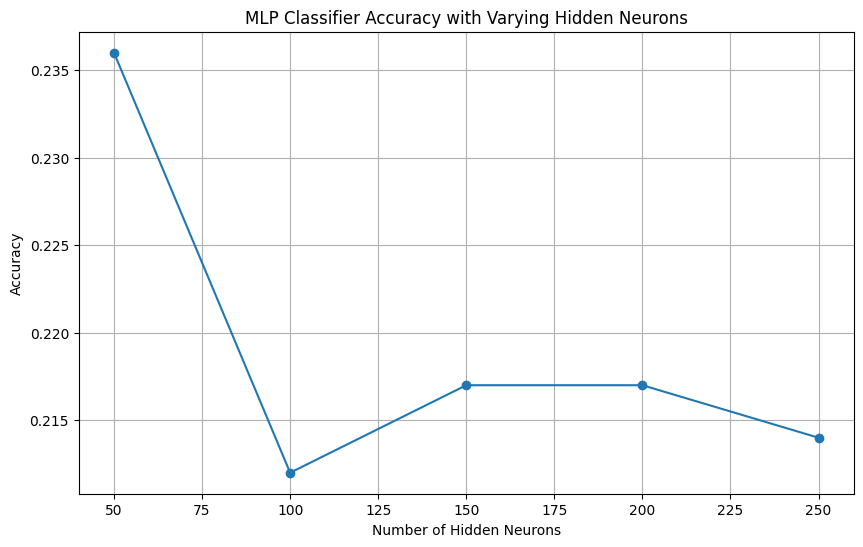

Number of neurons: 50, Test set accuracy: 25.80%
Number of neurons: 100, Test set accuracy: 26.60%
Number of neurons: 150, Test set accuracy: 25.50%
Number of neurons: 200, Test set accuracy: 26.20%
Number of neurons: 250, Test set accuracy: 24.90%


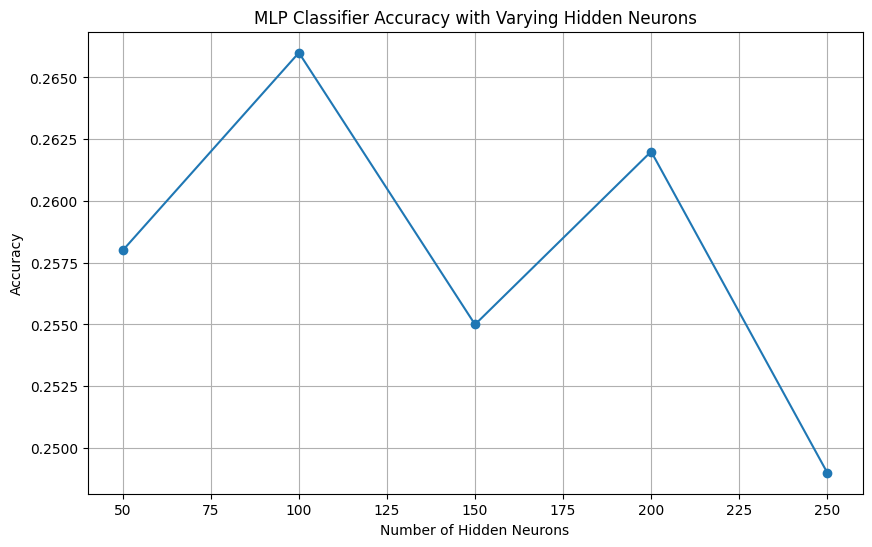

Number of neurons: 50, Test set accuracy: 9.10%
Number of neurons: 100, Test set accuracy: 10.40%
Number of neurons: 150, Test set accuracy: 10.40%
Number of neurons: 200, Test set accuracy: 10.40%
Number of neurons: 250, Test set accuracy: 9.10%


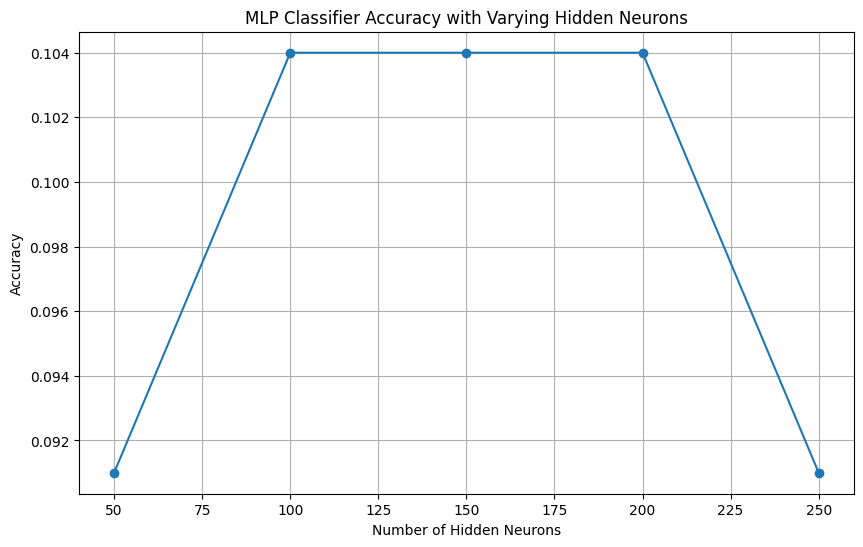

Number of neurons: 50, Test set accuracy: 9.10%
Number of neurons: 100, Test set accuracy: 9.10%
Number of neurons: 150, Test set accuracy: 9.10%
Number of neurons: 200, Test set accuracy: 9.10%
Number of neurons: 250, Test set accuracy: 9.10%


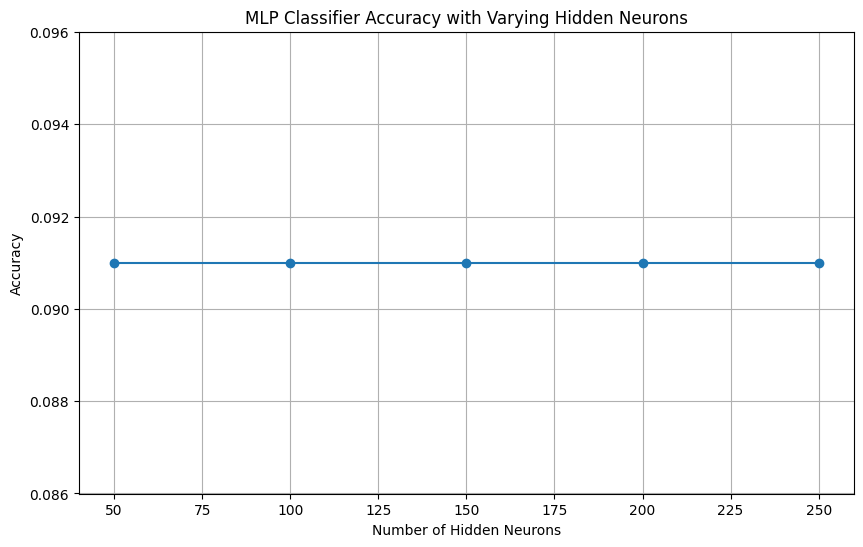

Number of neurons: 50, Test set accuracy: 26.00%
Number of neurons: 100, Test set accuracy: 25.90%
Number of neurons: 150, Test set accuracy: 24.90%
Number of neurons: 200, Test set accuracy: 25.40%
Number of neurons: 250, Test set accuracy: 26.20%


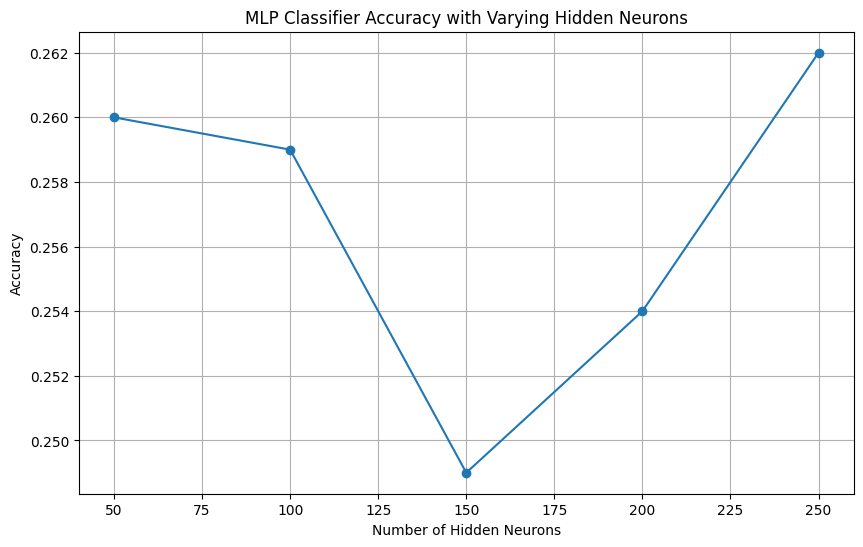

Number of neurons: 50, Test set accuracy: 10.30%
Number of neurons: 100, Test set accuracy: 10.20%
Number of neurons: 150, Test set accuracy: 11.20%
Number of neurons: 200, Test set accuracy: 10.40%
Number of neurons: 250, Test set accuracy: 10.40%


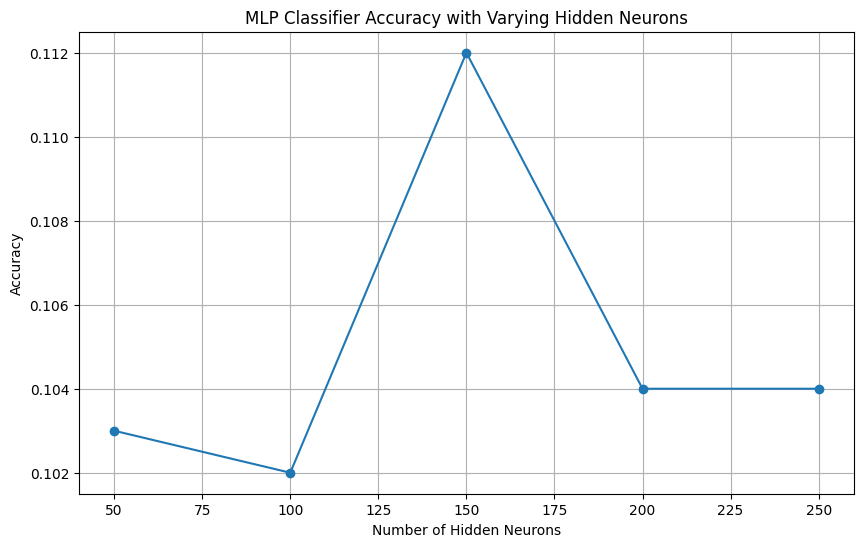

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Number of neurons: 50, Test set accuracy: 24.60%


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Number of neurons: 100, Test set accuracy: 26.70%


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Number of neurons: 150, Test set accuracy: 22.40%


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Number of neurons: 200, Test set accuracy: 25.90%
Number of neurons: 250, Test set accuracy: 23.00%


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


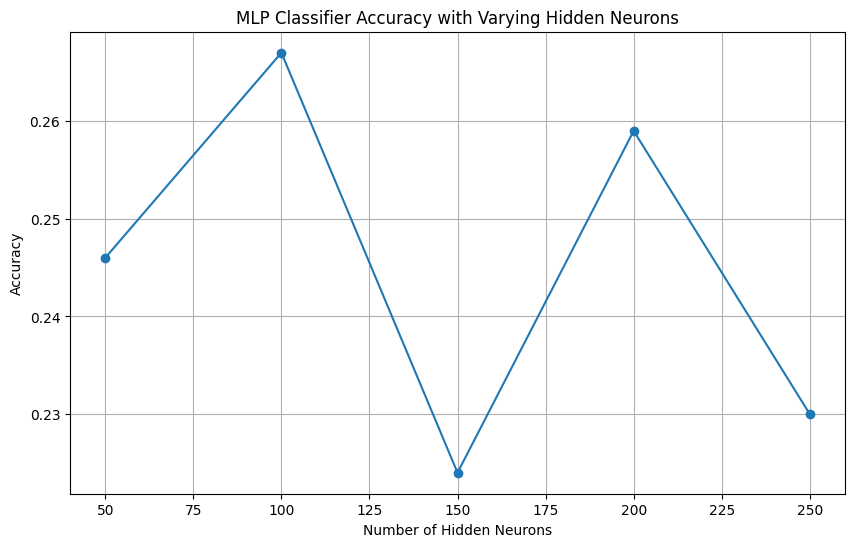

In [21]:

for activation in activations:
    for solver in solvers: 
        cool_shit(xtrain=xtrain_gray_flat_small, ytrain=ytrain_small_gray, xtest=xtest_gray_flat_small, ytest=ytest_small_gray, activation=activation, max_iter=max_iterations, solver=solver)


So let's look back at the larger pictures and select for the best one of these motherfuckers

In [46]:
# for activation in activations:
#     for solver in solvers: 
#         cool_shit(xtrain=xtrain_gray_flat, ytrain=y_train_flat, xtest=xtest_gray_flat, ytest=y_test_flat, activation=activation, max_iter=max_iterations, solver=solver)

# cool_shit(xtrain=xtrain_gray_flat, ytrain=y_train_flat.reshape(1, -1), xtest=xtest_gray_flat, ytest=y_test_flat, activation=activations[0], max_iter=max_iterations, solver=solvers[0])
mlp = MLPClassifier(10)
mlp.fit(x_train_flat[:100], ytrain1[:100])
predicated = mlp.predict(x_test_flat[:100])



In [48]:
accuracy = accuracy_score(y_test_flat[:100], predicated)
print(accuracy)

0.11


In [31]:
for activation in activations:
    for solver in solvers: 
        cool_shit(xtrain=xtrain1, ytrain=ytrain1, xtest=x_test, ytest=y_test, activation=activation, max_iter=max_iterations, solver=solver)


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


ValueError: Found array with dim 4. MLPClassifier expected <= 2.

In [35]:
mlp = MLPClassifier(hidden_layer_sizes=300, activation='relu', solver='adam', max_iter=4000, verbose=True)
mlp.add_bias = True;
mlp.fit(xtrain_gray_flat_small, ytrain_small_gray)

pred = mlp.predict(xtest_gray_flat_small)
print(accuracy_score(ytest_small_gray, pred))



Iteration 1, loss = 2.30226290
Iteration 2, loss = 2.29314463
Iteration 3, loss = 2.28358782
Iteration 4, loss = 2.27106149
Iteration 5, loss = 2.25388665
Iteration 6, loss = 2.23419375
Iteration 7, loss = 2.21408100
Iteration 8, loss = 2.19481098
Iteration 9, loss = 2.17926569
Iteration 10, loss = 2.16540869
Iteration 11, loss = 2.15397191
Iteration 12, loss = 2.14328746
Iteration 13, loss = 2.13424510
Iteration 14, loss = 2.12752367
Iteration 15, loss = 2.11970957
Iteration 16, loss = 2.11275739
Iteration 17, loss = 2.10657146
Iteration 18, loss = 2.10089070
Iteration 19, loss = 2.09674092
Iteration 20, loss = 2.09344740
Iteration 21, loss = 2.08845004
Iteration 22, loss = 2.08531229
Iteration 23, loss = 2.08025992
Iteration 24, loss = 2.07696686
Iteration 25, loss = 2.07367642
Iteration 26, loss = 2.07031159
Iteration 27, loss = 2.06845838
Iteration 28, loss = 2.06604944
Iteration 29, loss = 2.06348041
Iteration 30, loss = 2.06036831
Iteration 31, loss = 2.05862373
Iteration 32, los

In [24]:
print (ytrain_small_gray.shape)
print(xtest_gray_flat_small.shape)

(5000,)
(1000, 1024)


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of neurons: 50, Test set accuracy: 32.40%, Train Set Accuracy: 44.26%, Curr Loss: 1.6188132660937502, Best Loss; 1.6172964754675294


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Number of neurons: 100, Test set accuracy: 30.90%, Train Set Accuracy: 37.96%, Curr Loss: 1.7863766724096677, Best Loss; 1.7863766724096677


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of neurons: 150, Test set accuracy: 34.30%, Train Set Accuracy: 51.90%, Curr Loss: 1.437644904953613, Best Loss; 1.437644904953613


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of neurons: 250, Test set accuracy: 33.10%, Train Set Accuracy: 60.18%, Curr Loss: 1.2274296339648438, Best Loss; 1.2241445937939452
Number of neurons: 350, Test set accuracy: 32.50%, Train Set Accuracy: 43.38%, Curr Loss: 1.6476054693164064, Best Loss; 1.6476054693164064


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


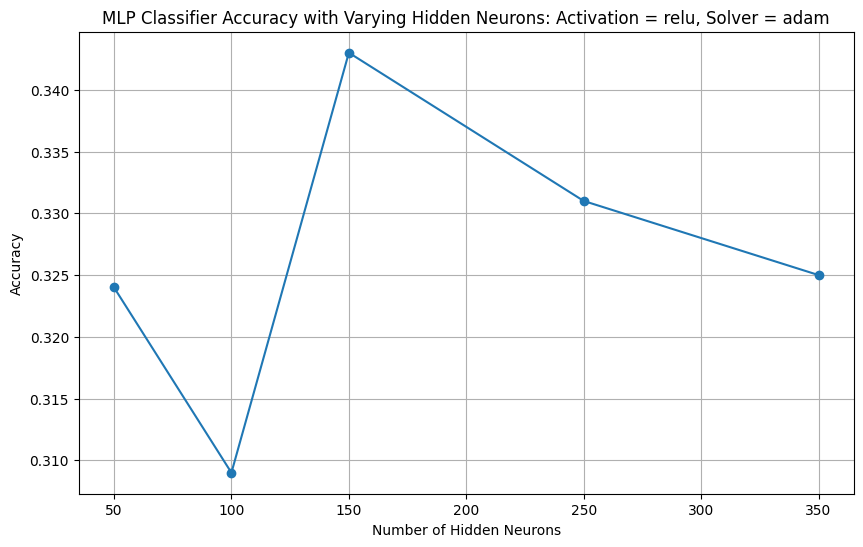

In [30]:
cool_shit(xtrain=xtrain_gray_flat_small, ytrain=ytrain_small_gray, xtest=xtest_gray_flat_small, ytest=ytest_small_gray)

In [ ]:
cool_shit(xtrain=xtrain_color_small, ytrain=ytrain_small_color, xtest=xtest_color_flat_small, ytest=ytest_small_color, max_iter=2500)


ValueError: Expected 2D array, got 1D array instead:
array=[2 5 2 ... 9 6 4].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Number of neurons: 50, Test set accuracy: 31.40%, Train Set Accuracy: 52.24%, Curr Loss: 1.4244593335839841, Best Loss; 1.424417446435547


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of neurons: 100, Test set accuracy: 30.60%, Train Set Accuracy: 66.90%, Curr Loss: 1.0604262237548827, Best Loss; 1.0580210606787108


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of neurons: 150, Test set accuracy: 31.00%, Train Set Accuracy: 80.34%, Curr Loss: 0.7396572656201171, Best Loss; 0.7363125359716796
Number of neurons: 250, Test set accuracy: 29.90%, Train Set Accuracy: 85.40%, Curr Loss: 0.6259261868188476, Best Loss; 0.6234112423632813


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of neurons: 350, Test set accuracy: 31.00%, Train Set Accuracy: 95.84%, Curr Loss: 0.3479338570654297, Best Loss; 0.34646821263916017


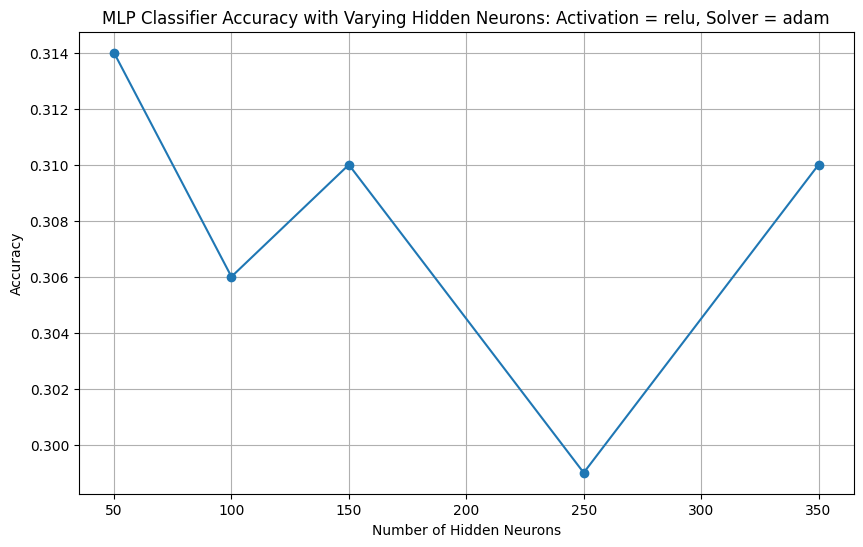

Number of neurons: 50, Test set accuracy: 11.20%, Train Set Accuracy: 10.50%, Curr Loss: 2.302201253988285, Best Loss; 2.302201253988285
Number of neurons: 100, Test set accuracy: 11.20%, Train Set Accuracy: 10.50%, Curr Loss: 2.3018848594756887, Best Loss; 2.3018848594756887
Number of neurons: 150, Test set accuracy: 9.70%, Train Set Accuracy: 10.40%, Curr Loss: 2.301964123225879, Best Loss; 2.301964123225879
Number of neurons: 250, Test set accuracy: 10.40%, Train Set Accuracy: 10.56%, Curr Loss: 2.301910552400436, Best Loss; 2.301910552400436
Number of neurons: 350, Test set accuracy: 9.70%, Train Set Accuracy: 10.40%, Curr Loss: 2.3020484247601134, Best Loss; 2.3020484247601134


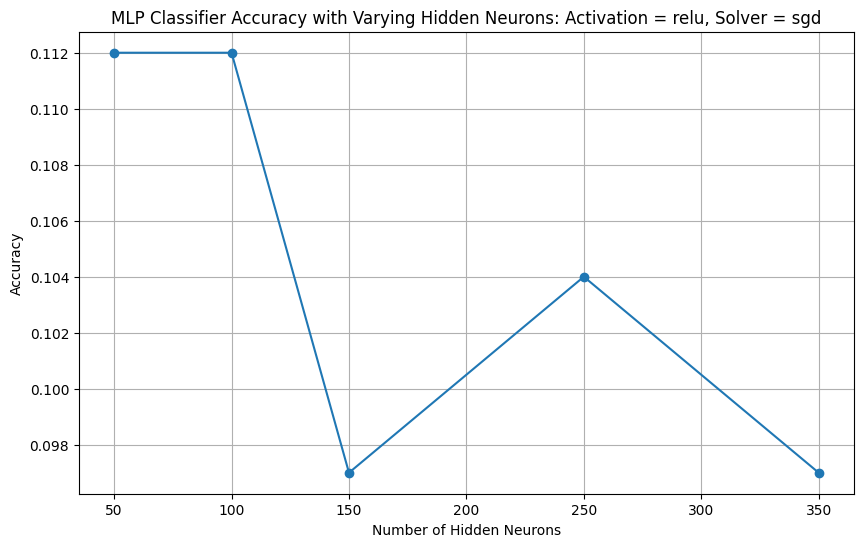

AttributeError: 'MLPClassifier' object has no attribute 'best_loss_'

In [16]:
for activation in activations:
    for solver in solvers: 
        cool_shit(xtrain=xtrain_gray_flat_small, ytrain=ytrain_small_gray, xtest=xtest_gray_flat_small, ytest=ytest_small_gray, activation=activation, max_iter=max_iterations, solver=solver)
